In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Jasmita/Downloads/Training.csv")

In [3]:
#understanding the data
data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [4]:
data.tail()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04
550175,NTM1,X1,A3,DIRECT,Small,Powder,Nov-20,139.42


In [5]:
data.shape

(550176, 8)

In [6]:
data.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [7]:
data.nunique()

ProductType             3
Manufacturer            3
Area Code              45
Sourcing Channel        4
Product Size            3
Product Type            2
Month of Sourcing      11
Sourcing Cost        4529
dtype: int64

In [8]:
data.isnull().sum()


ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [9]:
data.shape

(550176, 8)

In [10]:
data.describe()


,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [11]:
data.nunique()

ProductType             3
Manufacturer            3
Area Code              45
Sourcing Channel        4
Product Size            3
Product Type            2
Month of Sourcing      11
Sourcing Cost        4529
dtype: int64

In [12]:
data.isnull().sum()


ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

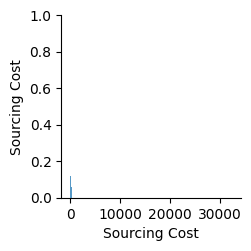

In [13]:
#anylysis of relationship
sns.pairplot(data)


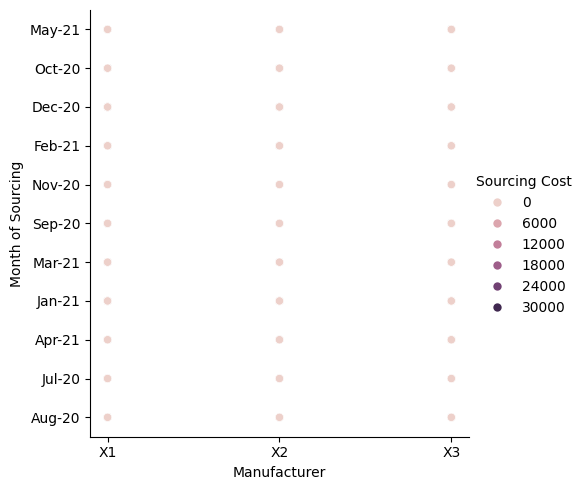

In [14]:
sns.relplot(x='Manufacturer',y='Month of Sourcing',hue='Sourcing Cost',data=data)

C:\Users\Jasmita\AppData\Local\Temp\ipykernel_11832\2530515667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sourcing Cost'])


<Axes: xlabel='Sourcing Cost', ylabel='Density'>

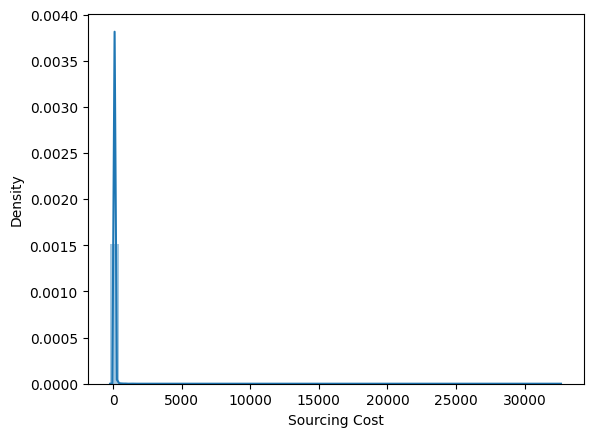

In [15]:
sns.distplot(data['Sourcing Cost'])

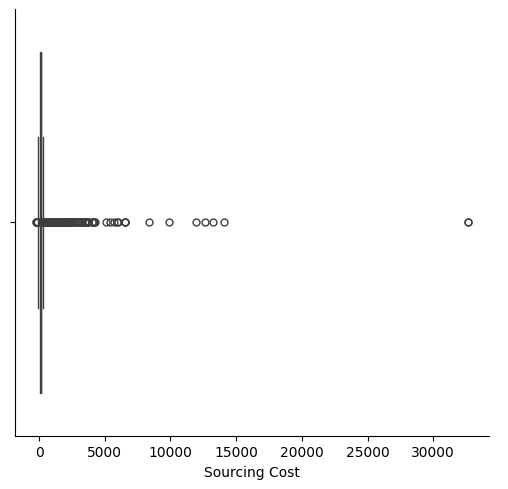

In [16]:
sns.catplot(x='Sourcing Cost',kind='box',data=data)

<Axes: ylabel='Sourcing Cost'>

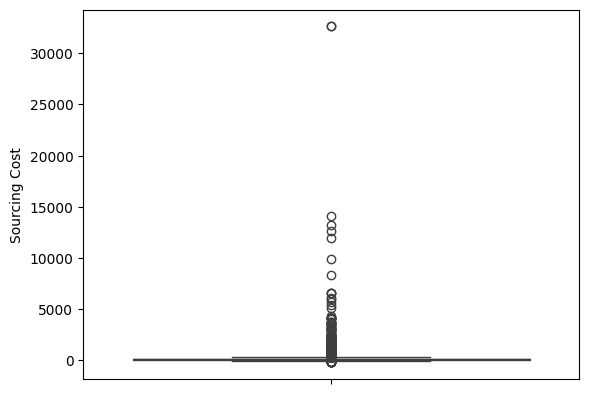

In [17]:
#to see outliers 
sns.boxplot(data['Sourcing Cost'])

In [18]:
#handling outliers using z-score
upper_limit = data['Sourcing Cost'].mean()+ 5*data['Sourcing Cost'].std()
lower_limit = data['Sourcing Cost'].mean()- 5*data['Sourcing Cost'].std()
print("upper:",upper_limit)
print("lower:",lower_limit)

upper: 630.7677508703778
lower: -413.13317793371743


In [19]:
#finding outliers
data.loc[(data['Sourcing Cost'] > upper_limit) | (data['Sourcing Cost'] < lower_limit)]

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
1098,NTM2,X1,A29,DIRECT,Small,Powder,Dec-20,1033.51
1267,NTM1,X1,A29,DIRECT,Small,Powder,Jan-21,772.44
1385,NTM3,X1,A35,DIRECT,Small,Liquid,Dec-20,891.67
2363,NTM3,X1,A35,DIRECT,Small,Liquid,Mar-21,992.96
2606,NTM3,X1,A35,DIRECT,Small,Liquid,Mar-21,660.34
...,...,...,...,...,...,...,...,...
548160,NTM3,X1,A35,DIRECT,ExtraLarge,Powder,Nov-20,741.00
548594,NTM2,X1,A23,RETAIL,Large,Powder,Feb-21,726.78
548904,NTM2,X1,A29,DIRECT,Large,Powder,Feb-21,992.24
549942,NTM3,X1,A35,DIRECT,ExtraLarge,Powder,Oct-20,3705.00


In [20]:
#trimming 
new_data= data.loc[(data['Sourcing Cost'] < upper_limit) & (data['Sourcing Cost'] > lower_limit)]
print("old data:",len(data))
print("new data:",len(new_data))
print("outliers:",len(data)-len(new_data))

old data: 550176
new data: 549647
outliers: 529


<Axes: ylabel='Sourcing Cost'>

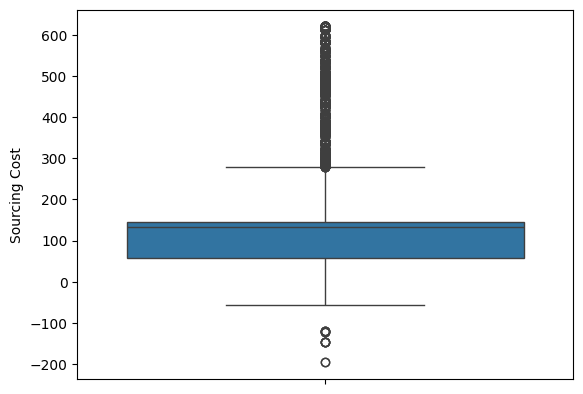

In [21]:
sns.boxplot(new_data['Sourcing Cost'])

<Axes: ylabel='Sourcing Cost'>

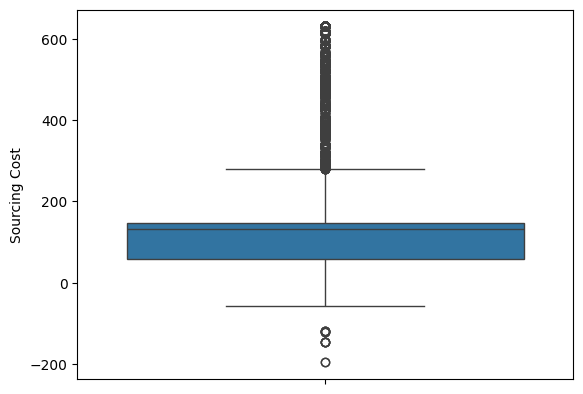

In [22]:

#capping
new_data= data.copy()
new_data.loc[new_data['Sourcing Cost'] > upper_limit,'Sourcing Cost'] = upper_limit
new_data.loc[new_data['Sourcing Cost'] < lower_limit,'Sourcing Cost'] = lower_limit
sns.boxplot(new_data['Sourcing Cost'])

In [23]:
len(new_data)

550176

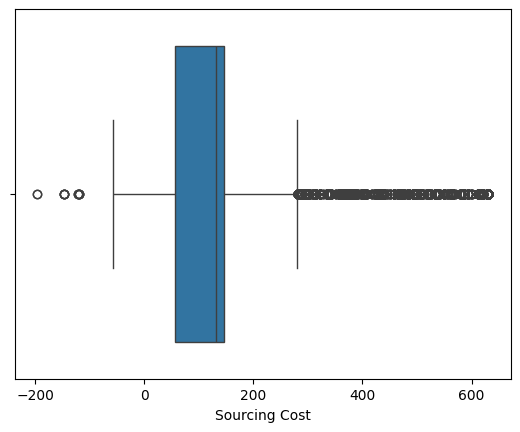

In [24]:
import matplotlib.pyplot as plt

sns.boxplot(x=new_data['Sourcing Cost'])
plt.xlabel('Sourcing Cost')
plt.show()

In [25]:
#percentile
upper= data['Sourcing Cost'].quantile(0.99)
lower= data['Sourcing Cost'].quantile(0.01)
print("upper",upper)
print("lower:",lower)

upper 224.18
lower: 0.0


<Axes: ylabel='Sourcing Cost'>

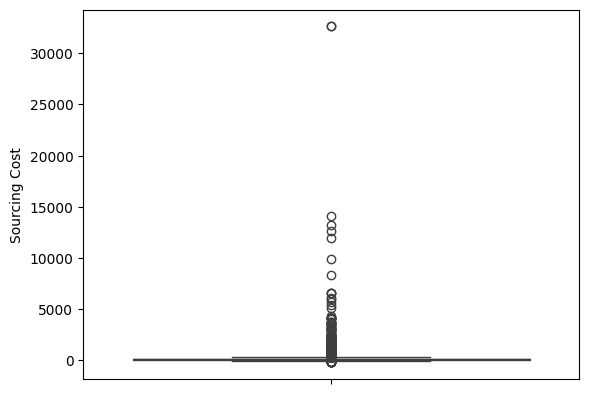

In [26]:
sns.boxplot(data['Sourcing Cost'])

In [27]:
data.loc[(data['Sourcing Cost'] > upper) | (data['Sourcing Cost'] < lower)]

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
495,NTM2,X1,A29,DIRECT,Small,Powder,Jan-21,334.88
533,NTM3,X1,A35,DIRECT,Small,Liquid,Nov-20,342.40
551,NTM2,X1,A29,DIRECT,Small,Powder,Jan-21,334.88
579,NTM3,X1,A35,DIRECT,Small,Liquid,Feb-21,401.25
680,NTM2,X1,A28,DIRECT,Large,Liquid,Jul-20,237.67
...,...,...,...,...,...,...,...,...
549874,NTM2,X1,A29,DIRECT,Large,Powder,Dec-20,233.27
549942,NTM3,X1,A35,DIRECT,ExtraLarge,Powder,Oct-20,3705.00
549946,NTM2,X1,A38,DIRECT,Small,Powder,Oct-20,457.14
549985,NTM2,X1,A29,DIRECT,Large,Powder,Feb-21,992.24


In [28]:
#trimming 
new_data= data.loc[(data['Sourcing Cost'] <= upper) & (data['Sourcing Cost'] >= lower)]
print("old data:",len(data))
print("new data:",len(new_data))
print("outliers:",len(data)-len(new_data))

old data: 550176
new data: 544616
outliers: 5560


<Axes: ylabel='Sourcing Cost'>

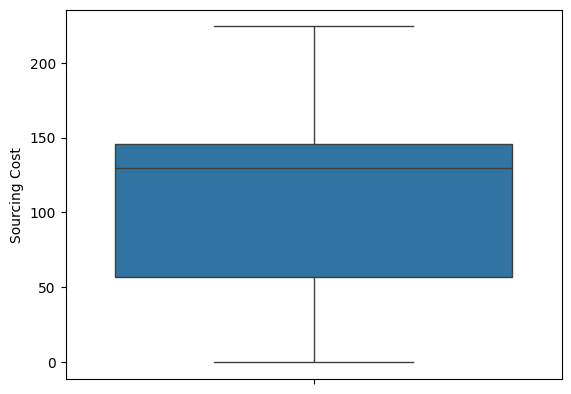

In [29]:
sns.boxplot(new_data['Sourcing Cost'])

<Axes: ylabel='Sourcing Cost'>

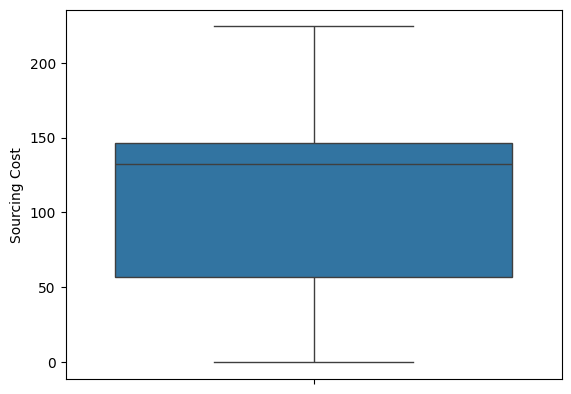

In [30]:
#capping
new_data= data.copy()
new_data.loc[new_data['Sourcing Cost'] > upper,'Sourcing Cost'] = upper
new_data.loc[new_data['Sourcing Cost'] < lower,'Sourcing Cost'] = lower
sns.boxplot(new_data['Sourcing Cost'])

In [31]:
len(new_data)


550176

C:\Users\Jasmita\AppData\Local\Temp\ipykernel_11832\2530515667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sourcing Cost'])


<Axes: xlabel='Sourcing Cost', ylabel='Density'>

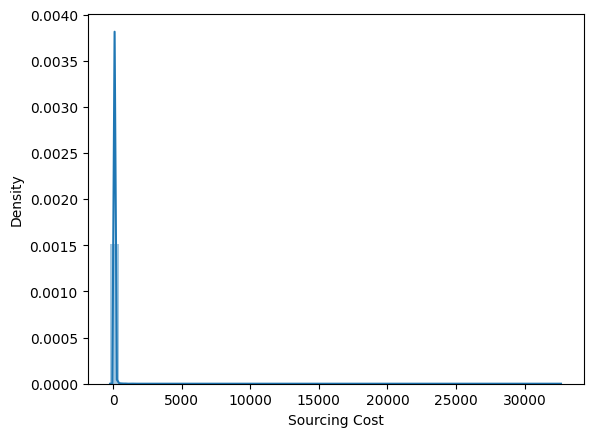

In [32]:
sns.distplot(data['Sourcing Cost'])

C:\Users\Jasmita\AppData\Local\Temp\ipykernel_11832\752803208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Sourcing Cost'])


<Axes: xlabel='Sourcing Cost', ylabel='Density'>

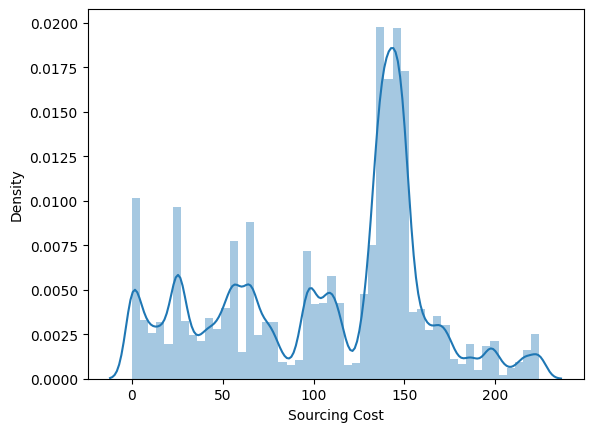

In [33]:
sns.distplot(new_data['Sourcing Cost'])

In [34]:
data=new_data

In [35]:
#using linear regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib  # Import joblib module
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error

training_data = data
testing_data = pd.read_csv("C:/Users/Jasmita/Downloads/Testing.csv")

# Combine training and testing data for preprocessing
combined_data = pd.concat([training_data, testing_data], ignore_index=True)

# Split data into features and target variable for training and testing
X_train = training_data.drop(columns=['Sourcing Cost'])
y_train = training_data['Sourcing Cost']
X_test = testing_data.drop(columns=['Sourcing Cost'])
categorical_features = X_train.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Fit the model
pipeline.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(pipeline, 'trained_model.pkl')

# Load the saved model
pipeline = joblib.load('trained_model.pkl')


testing_data = pd.read_csv("C:/Users/Jasmita/Downloads/Testing.csv")
X_test = testing_data.drop(columns=['Sourcing Cost'])


june_21_prediction = pipeline.predict(X_test)
# print('Predicted Sourcing Cost for June 21:', june_21_prediction)


# Calculate performance metrics
mae = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction)
mse = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction)
r2 = r2_score(testing_data['Sourcing Cost'], june_21_prediction)
medae = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction)
mape = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)
print('Median Absolute Error (MedAE):', medae)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Error (MAE): 23.448904717250116
Mean Squared Error (MSE): 1416.3732046615976
R-squared (R2) Score: 0.4779229323793178
Median Absolute Error (MedAE): 12.49195293452599
Mean Absolute Percentage Error (MAPE): 0.5117386585097528


In [37]:
from sklearn.ensemble import RandomForestRegressor


# Concatenate the predictions from linear regression with the original features
X_train_concat = pd.concat([X_train, pd.Series(pipeline.predict(X_train), name='Predicted_Sourcing_Cost_LR')], axis=1)
X_test_concat = pd.concat([X_test, pd.Series(june_21_prediction, name='Predicted_Sourcing_Cost_LR')], axis=1)

# Define preprocessing steps for categorical variables
categorical_features = X_train_concat.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline with Random Forest regressor
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Fit the Random Forest model
pipeline_rf.fit(X_train_concat, y_train)

# Predict sourcing cost for June 21 using Random Forest
june_21_prediction_rf = pipeline_rf.predict(X_test_concat)

# Calculate performance metrics for Random Forest
mae_rf = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_rf)
mse_rf = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction_rf)
r2_rf = r2_score(testing_data['Sourcing Cost'], june_21_prediction_rf)
medae_rf = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_rf)
mape_rf = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction_rf)

print('\nMetrics for Linear Regression + Random Forest:')
print('Mean Absolute Error (MAE):', mae_rf)
print('Mean Squared Error (MSE):', mse_rf)
print('R-squared (R2) Score:', r2_rf)


print('Median Absolute Error (MedAE):', medae_rf)
print('Mean Absolute Percentage Error (MAPE):', mape_rf)



# Output from google colab :
# Metrics for Random Forest:
# Mean Absolute Error (MAE): 18.799164413392493
# Mean Squared Error (MSE): 1369.272788027911
# R-squared (R2) Score: 0.4952842092792875
# Median Absolute Error (MedAE): 5.304145662513221
# Mean Absolute Percentage Error (MAPE): 0.4652902509129763



Metrics for Linear Regression + Random Forest:
Mean Absolute Error (MAE): 17.55381900251734
Mean Squared Error (MSE): 1154.755721286884
R-squared (R2) Score: 0.5743554885086228
Median Absolute Error (MedAE): 5.290527233016618
Mean Absolute Percentage Error (MAPE): 0.4532354016459956


In [40]:
#using ada boost only
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error

# Define preprocessing steps for categorical variables
categorical_features = X_train.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline with RandomForestRegressor and AdaBoostRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict sourcing cost for June 21 using the hybrid model
june_21_prediction_hybrid = pipeline.predict(X_test)

# Calculate performance metrics for the hybrid model
mae_hybrid = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
mse_hybrid = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
r2_hybrid = r2_score(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
medae_hybrid = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
mape_hybrid = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)

print('\nMetrics for AdaBoost):')
print('Mean Absolute Error (MAE):', mae_hybrid)
print('Mean Squared Error (MSE):', mse_hybrid)
print('R-squared (R2) Score:', r2_hybrid)
print('Median Absolute Error (MedAE):', medae_hybrid)
print('Mean Absolute Percentage Error (MAPE):', mape_hybrid)



Metrics for AdaBoost):
Mean Absolute Error (MAE): 27.87070477368057
Mean Squared Error (MSE): 1311.9597865409842
R-squared (R2) Score: 0.5164098586874769
Median Absolute Error (MedAE): 23.391454331727974
Mean Absolute Percentage Error (MAPE): 0.6026857960040489


In [41]:
#using only random forest 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error

training_data = data
testing_data = pd.read_csv("C:/Users/Jasmita/Downloads/Testing.csv")

# Combine training and testing data for preprocessing
combined_data = pd.concat([training_data, testing_data], ignore_index=True)

# Split data into features and target variable for training and testing
X_train = training_data.drop(columns=['Sourcing Cost'])
y_train = training_data['Sourcing Cost']
X_test = testing_data.drop(columns=['Sourcing Cost'])
categorical_features = X_train.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
# Define the pipeline with Random Forest regressor
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Fit the Random Forest model
pipeline_rf.fit(X_train, y_train)

# Predict sourcing cost for June 21 using Random Forest
june_21_prediction_rf = pipeline_rf.predict(X_test)

# Calculate performance metrics for Random Forest
mae_rf = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_rf)
mse_rf = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction_rf)
r2_rf = r2_score(testing_data['Sourcing Cost'], june_21_prediction_rf)
medae_rf = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_rf)
mape_rf = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction_rf)

print('\nMetrics for Random Forest only:')
print('Mean Absolute Error (MAE):', mae_rf)
print('Mean Squared Error (MSE):', mse_rf)
print('R-squared (R2) Score:', r2_rf)
print('Median Absolute Error (MedAE):', medae_rf)
print('Mean Absolute Percentage Error (MAPE):', mape_rf)

# Metrics for Random Forest:
#colab
# Mean Absolute Error (MAE): 17.607191292869874
# Mean Squared Error (MSE): 1263.575317208221
# R-squared (R2) Score: 0.5342444391387975
# Median Absolute Error (MedAE): 5.130831725933575
# Mean Absolute Percentage Error (MAPE): 0.44279319682179114



Metrics for Random Forest only:
Mean Absolute Error (MAE): 17.135749089639173
Mean Squared Error (MSE): 1163.2062644303473
R-squared (R2) Score: 0.5712406069437774
Median Absolute Error (MedAE): 4.9262105304598
Mean Absolute Percentage Error (MAPE): 0.4478759750922607


In [42]:
#using randomforest + adaboost
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error
# Define the pipeline with RandomForestRegressor and AdaBoostRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor([
        ('rf', RandomForestRegressor()),
        ('ada', AdaBoostRegressor())
    ]))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict sourcing cost for June 21 using the hybrid model
june_21_prediction_hybrid = pipeline.predict(X_test)

# Calculate performance metrics for the hybrid model
mae_hybrid = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
mse_hybrid = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
r2_hybrid = r2_score(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
medae_hybrid = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
mape_hybrid = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)

print('\nMetrics for Hybrid Model (Random Forest + AdaBoost):')
print('Mean Absolute Error (MAE):', mae_hybrid)
print('Mean Squared Error (MSE):', mse_hybrid)
print('R-squared (R2) Score:', r2_hybrid)
print('Median Absolute Error (MedAE):', medae_hybrid)
print('Mean Absolute Percentage Error (MAPE):', mape_hybrid)
# Metrics for Hybrid Model (Random Forest + AdaBoost):
# Mean Absolute Error (MAE): 22.479309862886527
# Mean Squared Error (MSE): 1046.3054561266924
# R-squared (R2) Score: 0.6143304020633069
# Median Absolute Error (MedAE): 14.82409163683357
# Mean Absolute Percentage Error (MAPE): 0.5508895545732262


Metrics for Hybrid Model (Random Forest + AdaBoost):
Mean Absolute Error (MAE): 20.597544943349465
Mean Squared Error (MSE): 936.40441870634
R-squared (R2) Score: 0.6548400722237199
Median Absolute Error (MedAE): 14.947244360558715
Mean Absolute Percentage Error (MAPE): 0.5005150748848611


In [45]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor  # Import XGBoost regressor
from sklearn.linear_model import LinearRegression  # Import Linear Regression
from sklearn.ensemble import VotingRegressor
X_train = training_data.drop(columns=['Sourcing Cost'])
y_train = training_data['Sourcing Cost']
X_test = testing_data.drop(columns=['Sourcing Cost'])
# Define preprocessing steps for categorical variables
categorical_features = X_train.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline with VotingRegressor combining XGBoost  and Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor([ ('lr', LinearRegression()),('xgb', XGBRegressor())]))  # Use VotingRegressor here
])
 
# Fit the model
pipeline.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(pipeline, 'trained_model_hybrid.pkl')

# Load the saved model
pipeline = joblib.load('trained_model_hybrid.pkl')

# Generate predictions for the testing data
june_21_prediction = pipeline.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction)
mse = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction)
r2 = r2_score(testing_data['Sourcing Cost'], june_21_prediction)
medae = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction)
mape = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction)
print("Metrices for Linear regression and xgboost:\n")
print('Mean Absolute Error (MAE)', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)
print('Median Absolute Error (MedAE):', medae)
print('Mean Absolute Percentage Error (MAPE):', mape)


Metrices for Linear regression and xgboost:

Mean Absolute Error (MAE) 19.00341150325706
Mean Squared Error (MSE): 1163.798652160669
R-squared (R2) Score: 0.5710222520298869
Median Absolute Error (MedAE): 7.8195648380226075
Mean Absolute Percentage Error (MAPE): 0.46305845699469267


In [47]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor  # Import XGBoost regressor
from sklearn.linear_model import LinearRegression  # Import Linear Regression
from sklearn.ensemble import VotingRegressor,AdaBoostRegressor
X_train = training_data.drop(columns=['Sourcing Cost'])
y_train = training_data['Sourcing Cost']
X_test = testing_data.drop(columns=['Sourcing Cost'])
# Define preprocessing steps for categorical variables
categorical_features = X_train.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline with VotingRegressor combining XGBoost  and Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor([ ('xgb', XGBRegressor()),('lr', LinearRegression()),('ada',AdaBoostRegressor())]))  # Use VotingRegressor here
])
 
# Fit the model
pipeline.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(pipeline, 'trained_model_hybrid.pkl')

# Load the saved model
pipeline = joblib.load('trained_model_hybrid.pkl')

# Generate predictions for the testing data
june_21_prediction = pipeline.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction)
mse = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction)
r2 = r2_score(testing_data['Sourcing Cost'], june_21_prediction)
medae = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction)
mape = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction)
print("Metrices for Linear regression , xgboost and adaboost:\n")
print('Mean Absolute Error (MAE)', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)
print('Median Absolute Error (MedAE):', medae)
print('Mean Absolute Percentage Error (MAPE):', mape)


Metrices for Linear regression , xgboost and adaboost:

Mean Absolute Error (MAE) 20.98947836346399
Mean Squared Error (MSE): 1024.5257599971094
R-squared (R2) Score: 0.6223584273405282
Median Absolute Error (MedAE): 13.977447756682615
Mean Absolute Percentage Error (MAPE): 0.49898141294993686


In [48]:
#using randomforest + xbgregressor
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor  

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error
# Define the pipeline with RandomForestRegressor and AdaBoostRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor([
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ]))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict sourcing cost for June 21 using the hybrid model
june_21_prediction_hybrid = pipeline.predict(X_test)

# Calculate performance metrics for the hybrid model
mae_hybrid = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
mse_hybrid = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
r2_hybrid = r2_score(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
medae_hybrid = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)
mape_hybrid = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction_hybrid)

print('\nMetrics for Hybrid Model (Random Forest + XGBoost):')
print('Mean Absolute Error (MAE):', mae_hybrid)
print('Mean Squared Error (MSE):', mse_hybrid)
print('R-squared (R2) Score:', r2_hybrid)
print('Median Absolute Error (MedAE):', medae_hybrid)
print('Mean Absolute Percentage Error (MAPE):', mape_hybrid)



Metrics for Hybrid Model (Random Forest + XGBoost):
Mean Absolute Error (MAE): 16.66061131088283
Mean Squared Error (MSE): 1122.678724470271
R-squared (R2) Score: 0.5861791126643032
Median Absolute Error (MedAE): 4.327319156360119
Mean Absolute Percentage Error (MAPE): 0.4362455524761472


In [99]:
#using gradient boosting : XGBRegressor 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib  # Import joblib module
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor  
# Define the pipeline with XGBoost regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(eta=0.1999,gamma=53,max_depth=6, min_child_weight=1,  reg_alpha=0, n_estimators=1000, 
                              learning_rate=0.1
                               ))  
])
# Fit the model
pipeline.fit(X_train, y_train)
# Save the trained model to a file
joblib.dump(pipeline, 'trained_model_xgboost.pkl')
# Load the saved model
pipeline = joblib.load('trained_model_xgboost.pkl')
# Generate predictions for the testing data
june_21_prediction = pipeline.predict(X_test)
# Calculate performance metrics
mae = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction)
mse = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction)
r2 = r2_score(testing_data['Sourcing Cost'], june_21_prediction)
medae = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction)
mape = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction)
print("Performance metrices for XGbRegressor: \n")
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)
print('Median Absolute Error (MedAE):', medae)
print('Mean Absolute Percentage Error (MAPE):', mape)
#colab : 18 

Performance metrices for XGbRegressor: 

Mean Absolute Error (MAE): 16.37233628074328
Mean Squared Error (MSE): 1079.6444785491233
R-squared (R2) Score: 0.6020415935724674
Median Absolute Error (MedAE): 4.116790771484375
Mean Absolute Percentage Error (MAPE): 0.42474132179943863


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions for randomized search
param_dist = {
    'regressor__n_estimators': randint(100, 1000),
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': randint(2, 20),
    'regressor__min_samples_leaf': randint(1, 20)
}

# Define the pipeline with Random Forest regressor
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Perform randomized search with cross-validation
random_search_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

# Get the best model from random search
best_rf_model = random_search_rf.best_estimator_

# Predict sourcing cost for June 21 using the best model
june_21_prediction_rf_best = best_rf_model.predict(X_test)

# Calculate performance metrics for the best Random Forest model
mae_rf_best = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_rf_best)
mse_rf_best = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction_rf_best)
r2_rf_best = r2_score(testing_data['Sourcing Cost'], june_21_prediction_rf_best)
medae_rf_best = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_rf_best)
mape_rf_best = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction_rf_best)

print('\nMetrics for Best Random Forest Model:')
print('Mean Absolute Error (MAE):', mae_rf_best)
print('Mean Squared Error (MSE):', mse_rf_best)
print('R-squared (R2) Score:', r2_rf_best)
print('Median Absolute Error (MedAE):', medae_rf_best)
print('Mean Absolute Percentage Error (MAPE):', mape_rf_best)


In [ ]:
#using only random forest with different hyperparameters 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error
categorical_features = X_train.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
# Define the pipeline with Random Forest regressor
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=500,random_state=42))
])

# Fit the Random Forest model
pipeline_rf.fit(X_train, y_train)

# Predict sourcing cost for June 21 using Random Forest
june_21_prediction_rf = pipeline_rf.predict(X_test)

# Calculate performance metrics for Random Forest
mae_rf = mean_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_rf)
mse_rf = mean_squared_error(testing_data['Sourcing Cost'], june_21_prediction_rf)
r2_rf = r2_score(testing_data['Sourcing Cost'], june_21_prediction_rf)
medae_rf = median_absolute_error(testing_data['Sourcing Cost'], june_21_prediction_rf)
mape_rf = mean_absolute_percentage_error(testing_data['Sourcing Cost'], june_21_prediction_rf)

print('\nMetrics for Random Forest only (1):')
print('Mean Absolute Error (MAE):', mae_rf)
print('Mean Squared Error (MSE):', mse_rf)
print('R-squared (R2) Score:', r2_rf)
print('Median Absolute Error (MedAE):', medae_rf)
print('Mean Absolute Percentage Error (MAPE):', mape_rf)

# Metrics for Random Forest:
#colab
# Mean Absolute Error (MAE): 17.607191292869874
# Mean Squared Error (MSE): 1263.575317208221
# R-squared (R2) Score: 0.5342444391387975
# Median Absolute Error (MedAE): 5.130831725933575
# Mean Absolute Percentage Error (MAPE): 0.44279319682179114


# Methods Used to Handle Outliers in the Dataset:

### 1. Z-score:
   - The Z-score method involves calculating the standard score of each data point in the dataset. Data points with a Z-score greater than a certain threshold (usually 3 or -3) are considered outliers and can be removed or adjusted.

### 2. Percentile:
   - The percentile method involves identifying outliers based on their position in the data's distribution. Data points falling below a certain percentile (e.g., 1st or 5th percentile) or above a certain percentile (e.g., 99th or 95th percentile) are considered outliers and can be treated accordingly.


# Set of algorithms used and their comparison: Total Count 9

## Simple Models:

### 1. Linear Regression 
- **Explanation**: 
- **Performance Metrics**: 
  - Mean Absolute Error (MAE): 23.448904717250116
  - Mean Squared Error (MSE): 1416.3732046615976
  - R-squared (R2) Score: 0.4779229323793178
  - Median Absolute Error (MedAE): 12.49195293452599
  - Mean Absolute Percentage Error (MAPE): 0.5117386585097528

### 2. Random Forest 
- **Explanation**: 
- **Performance Metrics**: 
  - Mean Absolute Error (MAE): 17.135749089639173
  - Mean Squared Error (MSE): 1163.2062644303473
  - R-squared (R2) Score: 0.5712406069437774
  - Median Absolute Error (MedAE): 4.9262105304598
  - Mean Absolute Percentage Error (MAPE): 0.4478759750922607

### 3. Ada Boost 
- **Explanation**: 
- **Performance Metrics**: 
  - Mean Absolute Error (MAE): 27.87070477368057
  - Mean Squared Error (MSE): 1311.9597865409842
  - R-squared (R2) Score: 0.5164098586874769
  - Median Absolute Error (MedAE): 23.391454331727974
  - Mean Absolute Percentage Error (MAPE): 0.6026857960040489

### 4. XG Boost 
- **Explanation**: 
- **Performance Metrics**: 
  - Mean Absolute Error (MAE): 16.37233628074328
  - Mean Squared Error (MSE): 1079.6444785491233
  - R-squared (R2) Score: 0.6020415935724674
  - Median Absolute Error (MedAE): 4.116790771484375
  - Mean Absolute Percentage Error (MAPE): 0.42474132179943863

## Hybrid Models:

### 1. Linear Regression + Random Forest 
- **Performance Metrics**: 
  - Mean Absolute Error (MAE): 17.55381900251734
  - Mean Squared Error (MSE): 1154.755721286884
  - R-squared (R2) Score: 0.5743554885086228
  - Median Absolute Error (MedAE): 5.290527233016618
  - Mean Absolute Percentage Error (MAPE): 0.4532354016459956

### 2. Random Forest + Ada Boost 
- **Performance Metrics**: 
  - Mean Absolute Error (MAE): 20.597544943349465
  - Mean Squared Error (MSE): 936.40441870634
  - R-squared (R2) Score: 0.6548400722237199
  - Median Absolute Error (MedAE): 14.947244360558715
  - Mean Absolute Percentage Error (MAPE): 0.5005150748848611

### 3. Linear Regression + XGBoost 
- **Performance Metrics**: 
  - Mean Absolute Error (MAE): 19.00341150325706
  - Mean Squared Error (MSE): 1163.798652160669
  - R-squared (R2) Score: 0.5710222520298869
  - Median Absolute Error (MedAE): 7.8195648380226075
  - Mean Absolute Percentage Error (MAPE): 0.46305845699469267

### 4. Linear Regression + XGBoost + Ada Boost 
- **Performance Metrics**: 
  - Mean Absolute Error (MAE): 20.98947836346399
  - Mean Squared Error (MSE): 1024.5257599971094
  - R-squared (R2) Score: 0.6223584273405282
  - Median Absolute Error (MedAE): 13.977447756682615
  - Mean Absolute Percentage Error (MAPE): 0.49898141294993686

### 5. Random Forest + XGBoost 
- **Performance Metrics**: 
  - Mean Absolute Error (MAE): 16.66061131088283
  - Mean Squared Error (MSE): 1122.678724470271
  - R-squared (R2) Score: 0.5861791126643032
  - Median Absolute Error (MedAE): 4.327319156360119
  - Mean Absolute Percentage Error (MAPE): 0.4362455524761472

## Final Approach:
XGBoost is the final algorithm for the dataset because it proved to be the most effective algorithm with a mean absolute error of 16.3.
